In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("s8a-dataframes-arrays").getOrCreate()
# Hay columnas que se llaman igual pero con diferente case -> good for kids
spark.conf.set("spark.sql.caseSensitive", "true")

df = spark.read.option("inferSchema", "true").json("yelp_academic_dataset_business.json")
    
df.printSchema()

root
 |-- attributes: struct (nullable = true)
 |    |-- Accepts Credit Cards: string (nullable = true)
 |    |-- Accepts Insurance: boolean (nullable = true)
 |    |-- Ages Allowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: struct (nullable = true)
 |    |    |-- casual: boolean (nullable = true)
 |    |    |-- classy: boolean (nullable = true)
 |    |    |-- divey: boolean (nullable = true)
 |    |    |-- hipster: boolean (nullable = true)
 |    |    |-- intimate: boolean (nullable = true)
 |    |    |-- none: boolean (nullable = true)
 |    |    |-- romantic: boolean (nullable = true)
 |    |    |-- touristy: boolean (nullable = true)
 |    |    |-- trendy: boolean (nullable = true)
 |    |    |-- upscale: boolean (nullable = true)
 |    |-- Attire: string (nullable = true)
 |    |-- BYOB: boolean (nullable = true)
 |    |-- BYOB/Corkage: string (nullable = true)
 |    |-- By Appointment Only: boolean (nullable = true)
 |    |-- Caters:

In [2]:
df.select("name", "city", "type", "review_count", "stars").show()

+--------------------+-----------+--------+------------+-----+
|                name|       city|    type|review_count|stars|
+--------------------+-----------+--------+------------+-----+
|Turf Paradise Rac...|    Phoenix|business|          29|  4.0|
|Sam's Club Member...|   Glendale|business|           3|  3.5|
|          Forever 21|      Tempe|business|           7|  3.5|
|Loving Hands Pet ...|   Chandler|business|           4|  5.0|
|Amec Mid-City Ani...|    Phoenix|business|           3|  5.0|
|Los Armandos Asad...|    Phoenix|business|           3|  5.0|
|   Clayton Companies| Scottsdale|business|           3|  5.0|
|       Bertha's Café|    Phoenix|business|         177|  4.5|
|    Jerry's Artarama|      Tempe|business|          21|  4.0|
|Shauna Brown Fitness| Cave Creek|business|           5|  5.0|
|    Simonmed Imaging|   Chandler|business|           5|  1.5|
|    Sweet Cakes Café|       Mesa|business|          70|  3.5|
|Michele's Massage...| Scottsdale|business|           3

In [3]:
from pyspark.sql.functions import count, avg, round
dfVotosCiudades = df.groupBy("city").agg(count("city").alias("votos"), round(avg("stars"), 3).alias("media")).orderBy("votos", ascending=False).limit(10)
dfVotosCiudades.show()

+----------+-----+-----+
|      city|votos|media|
+----------+-----+-----+
|   Phoenix| 5492|3.658|
|Scottsdale| 2617|3.809|
|     Tempe| 1444| 3.64|
|      Mesa| 1348|3.644|
|  Chandler| 1178|3.677|
|  Glendale|  821|3.588|
|   Gilbert|  630|3.755|
|    Peoria|  385|3.614|
|  Surprise|  241|3.598|
|  Goodyear|  214|3.498|
+----------+-----+-----+



In [4]:
pdVC = dfVotosCiudades.toPandas()
pdVC

,city,votos,media
0,Phoenix,5492,3.658
1,Scottsdale,2617,3.809
2,Tempe,1444,3.640
3,Mesa,1348,3.644
4,Chandler,1178,3.677
5,Glendale,821,3.588
6,Gilbert,630,3.755
7,Peoria,385,3.614
8,Surprise,241,3.598
9,Goodyear,214,3.498


In [5]:
from pyspark.sql.functions import round, sum, expr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

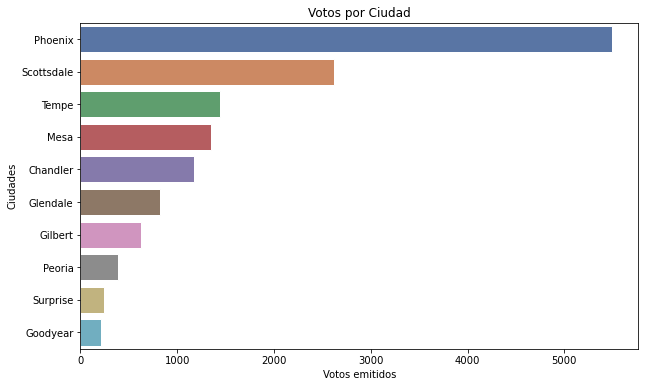

In [6]:
plt.figure(figsize=(10,6))
plt.ticklabel_format(useOffset=False, style="plain")
sns.set_theme(style="whitegrid")
sns.barplot(x="votos", y="city", data=pdVC).set_title("Votos por Ciudad")
plt.xlabel("Votos emitidos")
plt.ylabel("Ciudades")

plt.show()

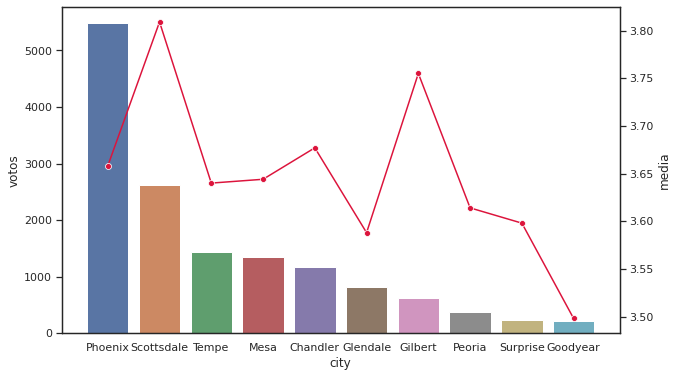

In [32]:
from matplotlib.ticker import PercentFormatter

plt.figure(figsize=(10,6))
sns.set_theme(style="white")
ax = sns.barplot(data = pdVC, y="votos", x="city")

ax2 = ax.twinx()
sns.lineplot(data = pdVC['media'], marker='o', color='crimson', ax=ax2)
plt.show()